# Uczenie Maszynowe - Wykład 4



# Klasyfikacja

## Wprowadzenie do klasyfikacji


Klasyfikacja to jedno z kluczowych zadań uczenia maszynowego, polegające na przypisywaniu nowych danych do jednej lub więcej zdefiniowanych kategorii. Jest szeroko stosowana w różnych dziedzinach, takich jak analiza tekstu, rozpoznawanie obrazów, medycyna czy prognozowanie finansowe.


## **Czym jest klasyfikacja?**

Klasyfikacja polega na opracowaniu funkcji decyzyjnej, która na podstawie zestawu cech wejściowych określa, do której kategorii (klasy) należy dany obiekt. Algorytm uczy się tej funkcji na podstawie oznaczonych danych treningowych, które zawierają przykłady z przypisanymi etykietami klas.

### **Rodzaje klasyfikacji**

1. **Klasyfikacja binarna**:
   - Dane są przypisywane do jednej z dwóch klas.
   - Przykład: Czy email jest spamem? (Spam/nie-spam)

2. **Klasyfikacja wieloklasowa**:
   - Dane mogą należeć do jednej z wielu klas.
   - Przykład: Rozpoznawanie gatunków kwiatów (setosa, versicolor, virginica).

3. **Klasyfikacja wieloetykietowa**:
   - Dane mogą należeć do więcej niż jednej klasy jednocześnie.
   - Przykład: Oznaczanie tematów w artykułach (sport, technologia, polityka).

---

## **Przykłady zastosowań klasyfikacji**

1. **Medycyna**:
   - Diagnoza chorób na podstawie wyników badań (zdrowy/chory).
2. **Analiza tekstu**:
   - Klasyfikacja wiadomości email (spam/nie-spam).
   - Analiza sentymentu (pozytywny/negatywny).
3. **Rozpoznawanie obrazów**:
   - Identyfikacja obiektów na zdjęciach (kot/pies).
4. **Finanse**:
   - Przewidywanie ryzyka kredytowego (dobra/zła zdolność kredytowa).
5. **Inżynieria i przemysł**:
   - Wykrywanie usterek w maszynach (działa/nie działa).

---

## **Jak działa klasyfikacja?**

1. **Zbiór danych treningowych**:
   - Algorytm otrzymuje zbiór przykładów, gdzie każda próbka jest oznaczona etykietą klasy.

2. **Budowa modelu**:
   - Algorytm tworzy reguły (funkcję decyzyjną), które pozwalają przypisać nowe dane do odpowiednich klas.

3. **Ocena modelu**:
   - Model jest testowany na danych testowych, które nie były używane podczas treningu.

4. **Przewidywanie**:
   - Model przypisuje nowe próbki do odpowiednich klas na podstawie wyuczonych reguł.

---

## **Podstawowe algorytmy klasyfikacyjne**

1. **Regresja logistyczna**:
   - Klasyczny algorytm do binarnej klasyfikacji, który przewiduje prawdopodobieństwo przynależności do danej klasy.

2. **k-Nearest Neighbors (k-NN)**:
   - Algorytm oparty na odległościach; przypisuje klasę na podstawie najbliższych sąsiadów w przestrzeni cech.

3. **Drzewa decyzyjne**:
   - Tworzą strukturę drzewa, gdzie każdy węzeł reprezentuje decyzję opartą na cechach danych.

4. **Naive Bayes**:
   - Algorytm probabilistyczny zakładający niezależność cech; często używany w klasyfikacji tekstu.

5. **Support Vector Machines (SVM)**:
   - Algorytm, który maksymalizuje margines między klasami, świetnie sprawdza się w przypadku złożonych granic decyzyjnych.

---

## **Granica decyzyjna**

Granica decyzyjna to linia (lub powierzchnia w wielowymiarowej przestrzeni), która oddziela różne klasy. W klasyfikacji kluczowe jest, aby granica decyzyjna była dobrze dopasowana do danych:
- **Overfitting**: Granica zbyt dokładnie odzwierciedla dane treningowe, przez co model nie generalizuje.
- **Underfitting**: Granica jest zbyt prosta, przez co model ignoruje ważne wzorce w danych.

---


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
from ipywidgets import interact

# Generate synthetic dataset
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Interactive function for classification
def interactive_classification(C=1.0, kernel='rbf', gamma=1.0):
    # Train SVM model with specified parameters
    model = SVC(C=C, kernel=kernel, gamma=gamma)
    model.fit(X_train, y_train)
    
    # Predict and calculate accuracy
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    
    # Plot decision boundary
    plt.figure(figsize=(12, 6))
    
    # Create mesh grid for decision boundary
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary and data points
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Training Data', edgecolor='k')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', label='Test Data', edgecolor='k')
    
    # Titles and labels
    plt.title(f"SVM Decision Boundary\nTrain Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive widgets for parameters
interact(
    interactive_classification,
    C=widgets.FloatLogSlider(value=1.0, base=10, min=-2, max=2, step=0.1, description='C (Regularization)'),
    kernel=widgets.RadioButtons(options=['linear', 'rbf', 'poly'], value='rbf', description='Kernel'),
    gamma=widgets.FloatLogSlider(value=1.0, base=10, min=-2, max=2, step=0.1, description='Gamma')
)


interactive(children=(FloatLogSlider(value=1.0, description='C (Regularization)', max=2.0, min=-2.0), RadioBut…

<function __main__.interactive_classification(C=1.0, kernel='rbf', gamma=1.0)>

# **Jak algorytmy klasyfikacyjne uczą się na przykładzie regresji logistycznej**

Algorytmy klasyfikacyjne uczą się przez proces optymalizacji, którego celem jest zminimalizowanie błędu predykcji. Na przykładzie regresji logistycznej możemy prześledzić, jak działa proces uczenia i jakie kroki są podejmowane, aby model poprawnie klasyfikował dane.

---

## **1. Funkcja decyzyjna w regresji logistycznej**

Regresja logistyczna to algorytm klasyfikacyjny stosowany do zadań binarnej klasyfikacji. Funkcja decyzyjna jest określona jako:

$$
P(y=1 | x) = \sigma(w^T x + b)
$$

gdzie:
- $$ \sigma(z) = \frac{1}{1 + e^{-z}} $$ – funkcja sigmoid (przekształca wyniki w zakres $ (0, 1) $),
- $ w $ – wektor wag,
- $ x $ – wektor cech,
- $ b $ – bias (przesunięcie).

Funkcja sigmoid zwraca prawdopodobieństwo przynależności próbki do klasy $ y=1 $.

---

## **2. Funkcja kosztu (Log-Loss)**

Aby nauczyć model odpowiednich wartości wag $ w $ i biasu $ b $, należy zdefiniować funkcję kosztu, która mierzy, jak dobrze model dopasowuje się do danych treningowych. W regresji logistycznej funkcją kosztu jest logarytmiczna funkcja straty (log-loss):

$$
\mathcal{L}(w, b) = -\frac{1}{N} \sum_{i=1}^N \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

gdzie:
- $ y_i $ – prawdziwa etykieta dla próbki $ i $,
- $ \hat{y}_i = P(y=1 | x_i) $ – przewidywane prawdopodobieństwo przez model,
- $ N $ – liczba próbek w zbiorze treningowym.

Funkcja kosztu karze za błędne przewidywania, szczególnie te o wysokim poziomie pewności.

---

## **3. Optymalizacja funkcji kosztu**

Uczenie się modelu polega na minimalizacji funkcji kosztu. Proces optymalizacji składa się z następujących kroków:

### **Krok 1: Inicjalizacja parametrów**
- Początkowe wartości wag $ w $ i biasu $ b $ są ustawiane losowo lub na zero.

### **Krok 2: Obliczanie gradientu**
- Gradient to wektor pochodnych funkcji kosztu względem parametrów $ w $ i $ b $:
  $$
  \frac{\partial \mathcal{L}}{\partial w_j} = \frac{1}{N} \sum_{i=1}^N ( \hat{y}_i - y_i ) x_{ij}
  $$
  $$
  \frac{\partial \mathcal{L}}{\partial b} = \frac{1}{N} \sum_{i=1}^N ( \hat{y}_i - y_i )
  $$
- Gradient wskazuje kierunek największego wzrostu funkcji kosztu.

### **Krok 3: Aktualizacja parametrów**
- Parametry są aktualizowane w kierunku przeciwnym do gradientu, aby minimalizować funkcję kosztu. Jest to realizowane za pomocą algorytmu **gradient descent**:
  $$
  w_j := w_j - \eta \frac{\partial \mathcal{L}}{\partial w_j}
  $$
  $$
  b := b - \eta \frac{\partial \mathcal{L}}{\partial b}
  $$
  gdzie $ \eta $ to współczynnik uczenia (ang. *learning rate*).

### **Krok 4: Iteracje**
- Proces obliczania gradientu i aktualizacji parametrów jest powtarzany przez wiele iteracji (epok), aż do osiągnięcia minimalnej wartości funkcji kosztu lub spełnienia innego kryterium stopu.

---

## **4. Wpływ hiperparametrów**

### **Współczynnik uczenia ($ \eta $)**
- **Zbyt mały**: Proces uczenia jest wolny, może utknąć w minimum lokalnym.
- **Zbyt duży**: Model może przeskakiwać minimum globalne, co prowadzi do niestabilności.

### **Liczba iteracji**
- Zbyt mała liczba iteracji powoduje niedouczenie modelu (ang. *underfitting*).
- Zbyt duża liczba iteracji może prowadzić do przeuczenia modelu (ang. *overfitting*).

---

## **5. Regularyzacja w regresji logistycznej**

Aby zapobiec przeuczeniu modelu, stosuje się **regularyzację**, która dodaje karę za duże wartości wag $ w $. Dwie najczęściej stosowane techniki to:
- **L2 (Ridge)**:
  $$
  \mathcal{L}_{\text{reg}}(w, b) = \mathcal{L}(w, b) + \frac{\lambda}{2} \sum_{j=1}^m w_j^2
  $$
- **L1 (Lasso)**:
  $$
  \mathcal{L}_{\text{reg}}(w, b) = \mathcal{L}(w, b) + \lambda \sum_{j=1}^m |w_j|
  $$
  gdzie $ \lambda $ to współczynnik regularyzacji.

---


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
from ipywidgets import interact

# Generate synthetic dataset
X, y = make_classification(
    n_samples=300, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0, 
    n_clusters_per_class=1, 
    class_sep=1.5, 
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Interactive function for logistic regression
def interactive_logistic(C=1.0):
    # Train logistic regression model with specified regularization strength
    model = LogisticRegression(C=C, solver='lbfgs', random_state=42)
    model.fit(X_train, y_train)
    
    # Predict and calculate accuracy
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    
    # Plot decision boundary
    plt.figure(figsize=(12, 6))
    
    # Create mesh grid for decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary and data points
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Training Data', edgecolor='k', alpha=0.7)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', label='Test Data', edgecolor='k', alpha=0.7)
    
    # Titles and labels
    plt.title(f"Logistic Regression Decision Boundary (C={C})\nTrain Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive widgets for regularization parameter C
interact(
    interactive_logistic,
    C=widgets.FloatLogSlider(value=1.0, base=10, min=-3, max=3, step=0.1, description='C (Regularization)')
)


interactive(children=(FloatLogSlider(value=1.0, description='C (Regularization)', max=3.0, min=-3.0), Output()…

<function __main__.interactive_logistic(C=1.0)>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
from ipywidgets import interact

# Generate synthetic dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Interactive function for logistic regression with polynomial features
def interactive_logistic_regression(degree=1, C=1.0):
    # Add polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Standardize the data
    scaler = StandardScaler()
    X_train_poly = scaler.fit_transform(X_train_poly)
    X_test_poly = scaler.transform(X_test_poly)
    
    # Train logistic regression model
    model = LogisticRegression(C=C, max_iter=500, random_state=42)
    model.fit(X_train_poly, y_train)
    
    # Predict and calculate accuracy
    y_pred_train = model.predict(X_train_poly)
    y_pred_test = model.predict(X_test_poly)
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    
    # Plot decision boundary
    plt.figure(figsize=(12, 6))
    
    # Create mesh grid for decision boundary
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary and data points
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Training Data', edgecolor='k')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', label='Test Data', edgecolor='k')
    
    # Titles and labels
    plt.title(f"Logistic Regression with Polynomial Features (Degree={degree})\nTrain Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive widgets for parameters
interact(
    interactive_logistic_regression,
    degree=widgets.IntSlider(min=1, max=10, step=1, value=1, description='Degree'),
    C=widgets.FloatLogSlider(value=1.0, base=10, min=-2, max=2, step=0.1, description='C (Regularization)')
)


interactive(children=(IntSlider(value=1, description='Degree', max=10, min=1), FloatLogSlider(value=1.0, descr…

<function __main__.interactive_logistic_regression(degree=1, C=1.0)>

# **Miary oceny w klasyfikacji**

Ocena modeli klasyfikacyjnych jest kluczowa dla zrozumienia, jak dobrze model radzi sobie z przypisywaniem próbek do odpowiednich klas. Poniżej znajdują się najważniejsze miary stosowane w klasyfikacji wraz z ich zastosowaniem.

---

## **1. Macierz pomyłek (Confusion Matrix)**

Macierz pomyłek to tablica, która pokazuje liczbę poprawnych i błędnych klasyfikacji dla każdej klasy. Składa się z czterech kluczowych wartości (dla klasyfikacji binarnej):

- **True Positive (TP)**: Próbki poprawnie zaklasyfikowane jako pozytywne.
- **True Negative (TN)**: Próbki poprawnie zaklasyfikowane jako negatywne.
- **False Positive (FP)**: Próbki błędnie zaklasyfikowane jako pozytywne (tzw. fałszywe alarmy).
- **False Negative (FN)**: Próbki błędnie zaklasyfikowane jako negatywne.

|                 | Predykcja pozytywna | Predykcja negatywna |
|-----------------|---------------------|---------------------|
| **Prawdziwie pozytywne (TP)** | Liczba próbek     | -                   |
| **Fałszywie pozytywne (FP)** | Liczba próbek     | -                   |
| **Fałszywie negatywne (FN)** | -                 | Liczba próbek       |
| **Prawdziwie negatywne (TN)** | -                 | Liczba próbek       |

---

## **2. Accuracy (dokładność)**

Accuracy mierzy odsetek poprawnie zaklasyfikowanych próbek w całym zbiorze danych:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

- **Zaleta**: Proste do zrozumienia i obliczenia.
- **Wada**: Niewystarczające w przypadku danych niezbalansowanych (np. 95% próbek w jednej klasie).

---

## **3. Precision (precyzja)**

Precyzja to miara dokładności przewidywań dla klasy pozytywnej:

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

- **Zastosowanie**: Ważna, gdy zależy nam na minimalizacji fałszywych alarmów (np. klasyfikacja chorób rzadkich).

---

## **4. Recall (czułość, TPR)**

Czułość to miara zdolności modelu do wykrywania wszystkich próbek należących do klasy pozytywnej:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

- **Zastosowanie**: Ważna, gdy zależy nam na minimalizacji liczby przeoczonych przypadków (np. wykrywanie oszustw finansowych).

---

## **5. F1-Score**

F1-Score to harmoniczna średnia precyzji i czułości, która łączy te dwie miary w jedną:

$$
\text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

- **Zastosowanie**: Przydatna, gdy chcemy zrównoważyć precyzję i czułość, szczególnie w przypadku niezbalansowanych danych.

---

## **6. Specyficzność (Specificity, TNR)**

Specyficzność mierzy zdolność modelu do prawidłowego identyfikowania próbek należących do klasy negatywnej:

$$
\text{Specificity} = \frac{TN}{TN + FP}
$$

- **Zastosowanie**: Ważna w sytuacjach, gdy istotne jest minimalizowanie liczby fałszywych alarmów (np. systemy bezpieczeństwa).

---

## **7. NPV (Negative Predictive Value)**

NPV mierzy odsetek próbek zaklasyfikowanych jako negatywne, które rzeczywiście należą do klasy negatywnej:

$$
\text{NPV} = \frac{TN}{TN + FN}
$$

- **Zastosowanie**: Ważna w przypadkach, gdy chcemy dokładnie ocenić prawidłowość klasyfikacji negatywnych.

---

## **8. ROC Curve i AUC**

- **ROC Curve (Receiver Operating Characteristic Curve)**: Graficzna reprezentacja stosunku True Positive Rate (Recall) do False Positive Rate (FPR) dla różnych progów klasyfikacji:
  $$
  \text{FPR} = \frac{FP}{FP + TN}
  $$

- **AUC (Area Under the Curve)**: Miara jakości modelu. Wartość bliska 1 oznacza doskonały model, a wartość 0.5 wskazuje model losowy.

---

## **9. Log-Loss (logarytmiczna funkcja straty)**

Log-Loss mierzy pewność modelu w jego przewidywaniach poprzez uwzględnienie prawdopodobieństw:

$$
\text{Log-Loss} = -\frac{1}{N} \sum_{i=1}^N \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

- **Zastosowanie**: Szczególnie ważna w modelach probabilistycznych, takich jak regresja logistyczna.

---

## **Podsumowanie**

- **Accuracy** jest łatwe w interpretacji, ale nie zawsze odpowiednie dla danych niezbalansowanych.
- **Precision** i **Recall** pozwalają lepiej zrozumieć wyniki dla danych, gdzie klasy są nierównomiernie reprezentowane.
- **F1-Score** pomaga zrównoważyć precyzję i czułość.
- **Specificity** i **NPV** są szczególnie istotne w analizie klasy negatywnej.
- **ROC Curve i AUC** umożliwiają ocenę zdolności modelu do rozróżniania klas dla różnych progów decyzyjnych.

Wybór odpowiedniej miary zależy od specyfiki problemu i tego, jakie błędy są bardziej kosztowne w danym kontekście.


interactive(children=(FloatLogSlider(value=1.0, description='C (Regularization)', max=2.0, min=-2.0), FloatSli…

<function __main__.interactive_classification_metrics(C=1.0, threshold=0.5)>

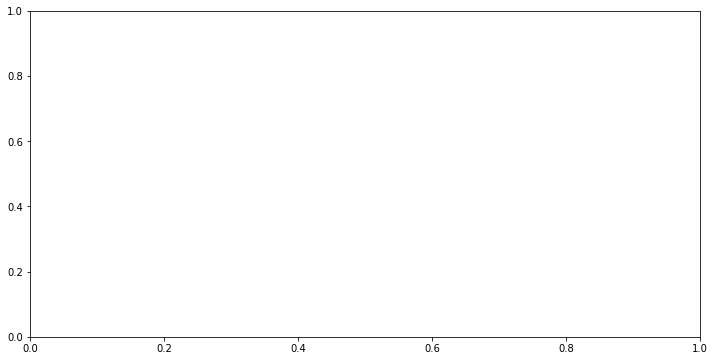

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import ipywidgets as widgets
from ipywidgets import interact

# Generate an imbalanced dataset (skrajny przypadek)
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.92, 0.08],  # Imbalanced classes (95% to 5%)
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Interactive function for classification metrics
def interactive_classification_metrics(C=1.0, threshold=0.5):
    # Train logistic regression model
    model = LogisticRegression(C=C, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict probabilities
    y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
    
    # Apply threshold
    y_pred = (y_probs >= threshold).astype(int)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot decision boundary and data points
    plt.figure(figsize=(12, 6))
    
    # Mesh grid for decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, levels=[0, threshold, 1], alpha=0.8, cmap='coolwarm', linestyles='dashed')
    
    # Plot data points
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired, alpha=0.6)
    plt.title(f"Decision Boundary (Threshold={threshold:.2f})\nAccuracy={acc:.2f}, Precision={precision:.2f}, Recall={recall:.2f}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar(label="Probability of Class 1")
    plt.grid(True)
    plt.show()

# Interactive widgets for parameters
interact(
    interactive_classification_metrics,
    C=widgets.FloatLogSlider(value=1.0, base=10, min=-2, max=2, step=0.1, description='C (Regularization)'),
    threshold=widgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=0.5, description='Threshold')
)


# **Niezbalansowanie klas w problemie klasyfikacyjnym**

Niezbalansowanie klas to sytuacja, w której liczba próbek jednej klasy znacząco różni się od liczby próbek innych klas w zbiorze danych. Jest to częsty problem w zadaniach klasyfikacyjnych, który może prowadzić do trudności w budowie skutecznych modeli.

---

## **Czym jest niezbalansowanie klas?**

W klasyfikacji binarnej występuje niezbalansowanie klas, gdy jedna klasa (np. pozytywna) jest reprezentowana przez znacznie mniej próbek niż druga klasa (np. negatywna). Klasa z większą liczbą próbek nazywana jest **klasą dominującą**, a klasa z mniejszą liczbą próbek to **klasa mniejszościowa**.

### **Przykłady niezbalansowania klas:**
- **Wykrywanie oszustw finansowych**:
  - 99,9% transakcji jest legalnych, tylko 0,1% to oszustwa.
- **Diagnostyka medyczna**:
  - Większość osób w badaniu jest zdrowa, tylko niewielka część jest chora.
- **Filtry antyspamowe**:
  - Większość wiadomości to normalne e-maile, a tylko niewielki procent to spam.

---

## **Dlaczego niezbalansowanie klas jest problemem?**

1. **Bias modelu w stronę klasy dominującej**:
   - Algorytmy uczące się optymalizują funkcję celu, często zakładając równomierny podział klas.
   - Model może ignorować klasę mniejszościową i osiągać wysoką dokładność (accuracy), ale kosztem niepoprawnej klasyfikacji próbek klasy mniejszościowej.

2. **Nieodpowiednie miary oceny**:
   - **Accuracy** może być mylące w przypadku niezbalansowanych danych.
     - Przykład: Jeśli 99% danych należy do klasy dominującej, model przewidujący zawsze tę klasę osiągnie dokładność 99%, ale nie będzie w ogóle skuteczny dla klasy mniejszościowej.

3. **Brak informacji w klasie mniejszościowej**:
   - Zbyt mała liczba próbek w klasie mniejszościowej ogranicza zdolność modelu do nauki wzorców związanych z tą klasą.

---

## **Jak radzić sobie z niezbalansowaniem klas?**

### **1. Przekształcanie danych**
- **Oversampling (nadpróbkowanie)**:
  - Tworzenie dodatkowych próbek dla klasy mniejszościowej, np. za pomocą technik takich jak SMOTE (Synthetic Minority Over-sampling Technique).
- **Undersampling (redukcja prób)**:
  - Zmniejszenie liczby próbek klasy dominującej poprzez losowe usunięcie ich części.
- **Generowanie syntetycznych danych**:
  - Tworzenie sztucznych próbek klasy mniejszościowej za pomocą modeli generatywnych.

### **2. Modyfikacja algorytmów**
- **Wagi klas**:
  - Dostosowanie algorytmu, aby karał bardziej za błędy w klasyfikacji klasy mniejszościowej (np. `class_weight` w scikit-learn).
- **Kosztowo-zorientowane uczenie**:
  - Użycie funkcji kosztu uwzględniającej różne wagi dla klas.

### **3. Dobór odpowiednich miar oceny**
- **Precision** i **Recall**:
  - Ważne miary, szczególnie w zadaniach z niezbalansowanymi danymi.
- **F1-Score**:
  - Harmoniczna średnia precyzji i czułości, odpowiednia dla niezbalansowanych danych.
- **ROC-AUC**:
  - Miara jakości modelu w rozróżnianiu klas niezależnie od progu decyzyjnego.
- **PR Curve (Precision-Recall Curve)**:
  - Wskazuje zależność między precyzją i czułością dla różnych progów, szczególnie przydatna w przypadku niezbalansowanych klas.

### **4. Zmiana progu decyzyjnego**
- Dostosowanie progu, przy którym próbki są klasyfikowane jako pozytywne, aby uwzględnić niezbalansowanie klas.

---

## **Przykład wpływu niezbalansowania klas**

Rozważmy zbiór danych, w którym 95% próbek należy do klasy negatywnej, a tylko 5% do klasy pozytywnej:
- Model przewidujący zawsze klasę negatywną osiągnie dokładność 95%, ale nie wykryje żadnej próbki klasy pozytywnej.
- Skupienie się na precyzji, czułości i F1-score pozwala lepiej ocenić model w kontekście klasy mniejszościowej.

---

## **Podsumowanie**

- Niezbalansowanie klas jest częstym problemem, który wpływa na skuteczność modeli klasyfikacyjnych.
- Odpowiednie przekształcenie danych, zmiana algorytmów i zastosowanie odpowiednich miar oceny pozwala skutecznie radzić sobie z tym wyzwaniem.
- Kluczowe jest zrozumienie, które błędy są bardziej kosztowne w danym problemie i dostosowanie strategii modelowania do tych potrzeb.



# **Błąd pierwszego i drugiego typu**

Błędy pierwszego i drugiego typu to kluczowe pojęcia w statystyce, uczeniu maszynowym i analizie danych, używane do opisania różnych rodzajów błędów popełnianych przez model lub test statystyczny.

---

## **1. Błąd pierwszego typu (Type I Error)**

### **Definicja**
Błąd pierwszego typu polega na **odrzuceniu hipotezy zerowej ($ H_0 $), gdy jest ona prawdziwa**. Oznacza to, że model lub test statystyczny wskazuje, że coś jest znaczące, podczas gdy w rzeczywistości tak nie jest.

### **Przykład**
- W medycynie:
  - Test diagnostyczny wskazuje, że pacjent jest chory, mimo że w rzeczywistości jest zdrowy (tzw. *fałszywy alarm*).
- W klasyfikacji:
  - Email jest błędnie zaklasyfikowany jako spam, mimo że jest to wiadomość ważna.

### **Konsekwencje**
Błąd pierwszego typu prowadzi do fałszywych alarmów i może powodować niepotrzebne działania, np. niewłaściwe leczenie lub podejmowanie kosztownych decyzji.

### **Prawdopodobieństwo błędu pierwszego typu**
- Prawdopodobieństwo popełnienia błędu pierwszego typu jest oznaczane jako $ \alpha $ (poziom istotności).
- Typowy poziom istotności to $ \alpha = 0.05 $, co oznacza, że istnieje 5% ryzyka odrzucenia $ H_0 $, gdy jest ona prawdziwa.

---

## **2. Błąd drugiego typu (Type II Error)**

### **Definicja**
Błąd drugiego typu polega na **nieodrzuceniu hipotezy zerowej ($ H_0 $), gdy jest ona fałszywa**. Oznacza to, że model lub test statystyczny nie wykrywa czegoś znaczącego, mimo że rzeczywiście występuje.

### **Przykład**
- W medycynie:
  - Test diagnostyczny wskazuje, że pacjent jest zdrowy, mimo że w rzeczywistości jest chory (tzw. *przeoczenie*).
- W klasyfikacji:
  - Spam jest błędnie zaklasyfikowany jako wiadomość ważna i trafia do skrzynki odbiorczej.

### **Konsekwencje**
Błąd drugiego typu prowadzi do przeoczenia istotnych zdarzeń, co może mieć poważne konsekwencje, np. brak leczenia chorego pacjenta lub przepuszczenie oszustwa.

### **Prawdopodobieństwo błędu drugiego typu**
- Prawdopodobieństwo popełnienia błędu drugiego typu jest oznaczane jako $ \beta $.
- Moc testu statystycznego (ang. *power*) to $ 1 - \beta $ i wskazuje zdolność testu do wykrywania efektu, gdy rzeczywiście istnieje.

---

## **3. Porównanie błędów pierwszego i drugiego typu**

| **Typ błędu**        | **Definicja**                                                  | **Przykład**                                   | **Konsekwencje**                              |
|----------------------|--------------------------------------------------------------|-----------------------------------------------|-----------------------------------------------|
| **Błąd pierwszego typu** | Odrzucenie $ H_0 $, gdy jest prawdziwa                     | Zdrowy pacjent zdiagnozowany jako chory       | Fałszywe alarmy, niepotrzebne działania        |
| **Błąd drugiego typu**  | Nieodrzucenie $ H_0 $, gdy jest fałszywa                   | Chory pacjent zdiagnozowany jako zdrowy       | Przeoczenie istotnych zdarzeń, brak reakcji    |

---

## **4. Balans między błędami**

Zwiększenie lub zmniejszenie ryzyka jednego typu błędu wpływa na drugi typ:
- Obniżenie poziomu istotności ($ \alpha $) zmniejsza ryzyko błędu pierwszego typu, ale zwiększa ryzyko błędu drugiego typu.
- Zwiększenie poziomu istotności ($ \alpha $) zmniejsza ryzyko błędu drugiego typu, ale zwiększa ryzyko błędu pierwszego typu.

### **Dobór priorytetów**
Dobór poziomu istotności i priorytetów zależy od kontekstu:
- **Preferencja minimalizacji błędu pierwszego typu**:
  - W badaniach naukowych, gdzie fałszywe odkrycia mogą prowadzić do błędnych wniosków.
- **Preferencja minimalizacji błędu drugiego typu**:
  - W medycynie, gdzie przeoczenie choroby może mieć poważne konsekwencje dla pacjenta.

---

## **5. Podsumowanie**

- **Błąd pierwszego typu** to odrzucenie prawdziwej hipotezy ($ H_0 $), prowadzące do fałszywych alarmów.
- **Błąd drugiego typu** to nieodrzucenie fałszywej hipotezy ($ H_0 $), prowadzące do przeoczenia istotnych zdarzeń.
- Zrozumienie i zarządzanie błędami pierwszego i drugiego typu jest kluczowe dla projektowania testów statystycznych i systemów uczenia maszynowego.


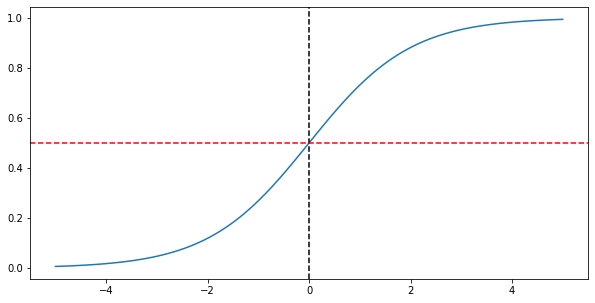

In [18]:
xs = np.linspace(-5,5,100)
ys = [1 / (1+np.exp(-z)) for z in xs]
plt.figure(figsize=(10,5))
plt.plot(xs,ys)
plt.axvline(0,0,c='k',ls='--')
plt.axhline(0.5,0,c='r',ls='--')

# **Funkcja sigmoid i próg decyzyjny w predykcji**

W algorytmach klasyfikacyjnych, takich jak regresja logistyczna, kluczowym elementem jest funkcja sigmoid. Przekształca ona wyniki liniowej funkcji decyzyjnej w prawdopodobieństwa, które mogą być następnie użyte do przypisywania próbek do klas za pomocą progu decyzyjnego.

---

## **Funkcja sigmoid**

Funkcja sigmoid, oznaczana jako $ \sigma(z) $, jest definiowana wzorem:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

gdzie:
- $ z $ to wynik funkcji liniowej $ z = w^T x + b $, gdzie $ w $ to wektor wag, $ x $ to wektor cech, a $ b $ to bias.

### **Właściwości funkcji sigmoid:**
1. **Zakres wartości**:
   - Funkcja sigmoid przekształca dowolne wartości $ z $ w przedział $ (0, 1) $, dzięki czemu może być interpretowana jako prawdopodobieństwo.

2. **Kształt**:
   - Funkcja sigmoid ma kształt litery "S" i przechodzi przez punkt $ (0, 0.5) $.
   - Dla $ z \to +\infty $: $ \sigma(z) \to 1 $.
   - Dla $ z \to -\infty $: $ \sigma(z) \to 0 $.

3. **Interpretacja**:
   - Wartość $ \sigma(z) $ reprezentuje prawdopodobieństwo przynależności próbki do klasy pozytywnej ($ y = 1 $).

---

## **Predykcja z użyciem funkcji sigmoid**

1. **Przekształcenie wyników liniowych na prawdopodobieństwa**:
   - Model wylicza wartość $ z = w^T x + b $ na podstawie cech wejściowych $ x $.
   - Funkcja sigmoid przekształca tę wartość na prawdopodobieństwo $ P(y=1|x) = \sigma(z) $.

2. **Przykład działania funkcji sigmoid**:
   - Jeśli $ z = 0 $: $ \sigma(z) = 0.5 $ (próbka jest równie prawdopodobna, aby należeć do obu klas).
   - Jeśli $ z > 0 $: $ \sigma(z) > 0.5 $ (model sugeruje klasę pozytywną).
   - Jeśli $ z < 0 $: $ \sigma(z) < 0.5 $ (model sugeruje klasę negatywną).

---

## **Próg decyzyjny (Decision Threshold)**

Próg decyzyjny to wartość, która określa, jak model przypisuje próbki do klas na podstawie prawdopodobieństw wygenerowanych przez funkcję sigmoid.

### **Jak działa próg decyzyjny?**
1. **Domyślny próg**:
   - Najczęściej stosowanym progiem jest $ 0.5 $. Jeśli $ P(y=1|x) \geq 0.5 $, model klasyfikuje próbkę jako należącą do klasy pozytywnej ($ y = 1 $), w przeciwnym razie do klasy negatywnej ($ y = 0 $).

2. **Modyfikacja progu**:
   - W niektórych problemach warto zmienić próg, aby dostosować model do konkretnego zadania:
     - **Zwiększenie progu** (np. $ 0.7 $):
       - Model staje się bardziej konserwatywny w przypisywaniu próbek do klasy pozytywnej.
       - Większa precyzja, ale mniejsza czułość.
     - **Zmniejszenie progu** (np. $ 0.3 $):
       - Model częściej przypisuje próbki do klasy pozytywnej.
       - Większa czułość, ale mniejsza precyzja.

3. **Przykład zastosowania**:
   - **Diagnoza chorób**:
     - Niski próg (np. $ 0.3 $) jest używany, aby minimalizować liczbę przeoczonych przypadków choroby (fałszywych negatywów).
   - **Wykrywanie spamu**:
     - Wyższy próg (np. $ 0.7 $) zmniejsza liczbę fałszywych alarmów (fałszywych pozytywów).

---

## **Podsumowanie**

1. Funkcja sigmoid przekształca wyniki modelu w prawdopodobieństwa, co pozwala na interpretację i podejmowanie decyzji.
2. Próg decyzyjny określa granicę, powyżej której próbka jest klasyfikowana jako pozytywna. Jego dobór zależy od konkretnego problemu i preferencji dotyczących precyzji i czułości.
3. Zrozumienie funkcji sigmoid i roli progu decyzyjnego jest kluczowe dla interpretacji wyników i dostosowywania modeli klasyfikacyjnych do różnych zadań.



# Metody Preprocessingu w Klasyfikacji ML

Preprocessing danych jest kluczowym krokiem w procesie budowy modeli Machine Learning. Pomaga poprawić jakość danych oraz dostosować je do wymagań algorytmów klasyfikacji. Oto najczęściej stosowane techniki:

### 1. Skalowanie danych
- **StandardScaler**: Normalizacja cech do średniej 0 i odchylenia standardowego 1.
- **MinMaxScaler**: Skalowanie cech do zakresu [0, 1].
- **RobustScaler**: Skalowanie odporne na wartości odstające (oparte na medianie i IQR).

### 2. Usuwanie braków w danych
- Wypełnianie braków wartością średnią, medianą lub najczęstszą wartością (modą).
- Usuwanie rekordów lub cech z dużą liczbą braków.

### 3. Kodowanie cech
- **One-Hot Encoding**: Zamiana kategorii na macierz binarną.
- **Label Encoding**: Kodowanie kategorii jako liczb całkowitych.

### 4. Redukcja wymiarowości
- **PCA (Principal Component Analysis)**: Ekstrakcja głównych składowych dla redukcji wymiaru.
- **SelectKBest**: Wybór cech na podstawie statystycznych miar istotności.

### 5. Usuwanie szumu w danych
- Filtry eliminujące szum (np. średnia ruchoma lub filtry medianowe).

### 6. Rozwiązywanie niezbalansowanych klas
- **Oversampling**: Zwiększanie liczby próbek klasy mniejszościowej (np. SMOTE).
- **Undersampling**: Redukowanie liczby próbek klasy większościowej.
- **Ważenie klas**: Dopasowanie wag w algorytmie klasyfikacji.

### 7. Selekcja cech
- Usuwanie cech o niskiej wariancji.
- Wybór cech na podstawie korelacji z klasą docelową.

Preprocessing pozwala zwiększyć efektywność modelu i poprawić jego zdolność generalizacji, dlatego jest kluczowy w procesie budowy modeli ML.


Transformacje danych są kluczowym krokiem w preprocesingu, umożliwiającym poprawę jakości modeli uczenia maszynowego oraz ich wydajności. W zależności od charakteru danych i wymagań modelu, stosuje się różne typy transformacji.


## Dlaczego transformacje danych są ważne?

1. **Poprawa jakości danych**:
   - Usunięcie szumów, braków danych lub wartości odstających.
   - Zmiana formatu danych, aby były lepiej przystosowane do analizy.

2. **Poprawa wydajności modeli**:
   - Niektóre algorytmy (np. SVM, regresja logistyczna) wymagają określonych formatów danych, np. tych o zbliżonych skalach.
   - Transformacje mogą zwiększyć szybkość zbieżności algorytmów optymalizacyjnych.

3. **Lepsza interpretowalność**:
   - Transformacje mogą ułatwić interpretację wyników modelu lub wizualizację danych.
   
### **1. Skalowanie (Scaling)**

#### **1.1. Standaryzacja**
- **Cel**: Przekształcenie cech tak, aby miały średnią 0 i odchylenie standardowe 1.
- **Kiedy stosować?**:
  - Algorytmy wrażliwe na różnice w skali cech (np. SVM, kNN, PCA).
- **Wzór**:
  $$
  z = \frac{x - \mu}{\sigma}
  $$
  gdzie $$ \mu $$ to średnia, a $$ \sigma $$ to odchylenie standardowe.

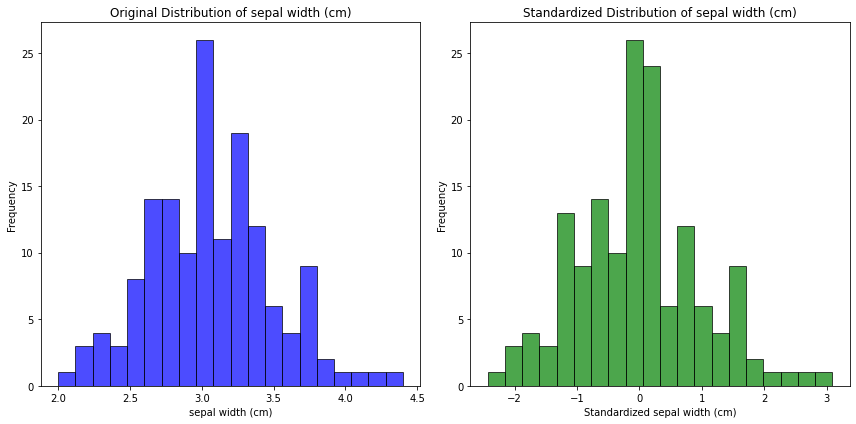

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

#Zbiór iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Selecting a single feature for demonstration
feature = 'sepal width (cm)'
values = df[feature]

# Standardize the feature
scaler = StandardScaler()
df[feature + '_scaled'] = scaler.fit_transform(values.values.reshape(-1, 1))

# Plot the distribution before and after standardization
plt.figure(figsize=(12, 6))

# Before standardization
plt.subplot(1, 2, 1)
plt.hist(values, bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title(f'Original Distribution of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')

# After standardization
plt.subplot(1, 2, 2)
plt.hist(df[feature + '_scaled'], bins=20, color='green', alpha=0.7, edgecolor='black')
plt.title(f'Standardized Distribution of {feature}')
plt.xlabel('Standardized ' + feature)
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#### **1.2. Normalizacja (Min-Max Scaling)**
- **Cel**: Przekształcenie cech na zakres \( [0, 1] \) lub \( [-1, 1] \).
- **Kiedy stosować?**:
  - Modele wymagające ograniczonych wartości (np. sieci neuronowe).
- **Wzór**:
  $$
  z = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
  $$

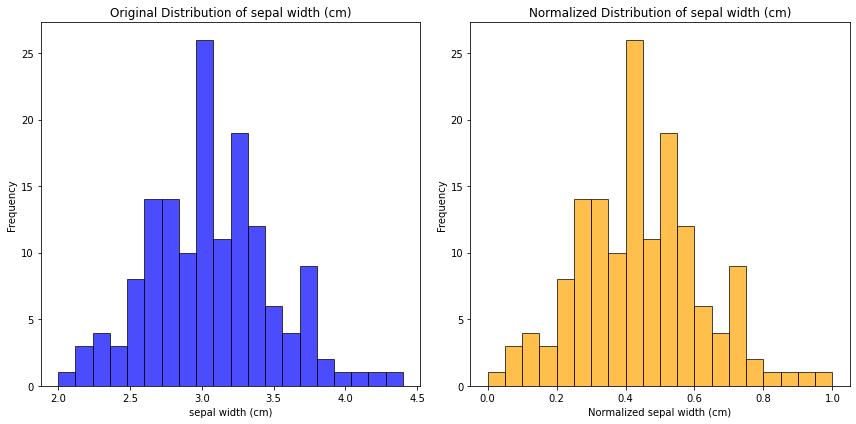

In [3]:
from sklearn.preprocessing import MinMaxScaler

# Select a single feature for demonstration
feature = 'sepal width (cm)'
values = df[feature].values

# Normalize the feature
scaler = MinMaxScaler(feature_range=(0, 1))
df[feature + '_normalized'] = scaler.fit_transform(values.reshape(-1, 1))

# Plot the distribution before and after normalization
plt.figure(figsize=(12, 6))

# Before normalization
plt.subplot(1, 2, 1)
plt.hist(values, bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title(f'Original Distribution of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')

# After normalization
plt.subplot(1, 2, 2)
plt.hist(df[feature + '_normalized'], bins=20, color='orange', alpha=0.7, edgecolor='black')
plt.title(f'Normalized Distribution of {feature}')
plt.xlabel('Normalized ' + feature)
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### **2. Transformacje logarytmiczne (Log Transformation)**

- **Cel**: Zmniejszenie wpływu dużych wartości odstających i zmiana rozkładu danych na bardziej symetryczny.
- **Wzór**:
  $$
  z = \log(x + 1)
  $$
  *(Dodanie 1 zapobiega problemom z zerowymi wartościami).*

- **Kiedy stosować?**
  - Gdy dane mają rozkład potęgowy (np. dochody, wielkości populacji).

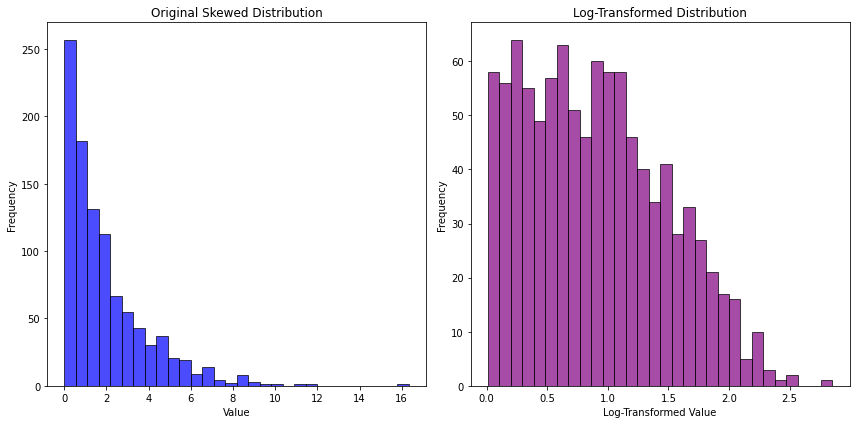

In [5]:
# Create a synthetic dataset with skewed data for demonstration
np.random.seed(42)
skewed_data = np.random.exponential(scale=2, size=1000)  # Highly skewed data

# Apply log transformation
log_transformed_data = np.log1p(skewed_data)  # Using log(1 + x) to handle zeros

# Plot the distribution before and after log transformation
plt.figure(figsize=(12, 6))

# Before log transformation
plt.subplot(1, 2, 1)
plt.hist(skewed_data, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Original Skewed Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# After log transformation
plt.subplot(1, 2, 2)
plt.hist(log_transformed_data, bins=30, color='purple', alpha=0.7, edgecolor='black')
plt.title('Log-Transformed Distribution')
plt.xlabel('Log-Transformed Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### **3. Root Transformation**

- **Cel**: Podobnie jak logarytm, redukuje wpływ dużych wartości, ale mniej agresywnie.
- **Wzór**:
  $$
  z = \sqrt{x}
  $$

- **Kiedy stosować?**
  - Dla danych z nieliniowymi zależnościami lub dużymi wartościami odstającymi.

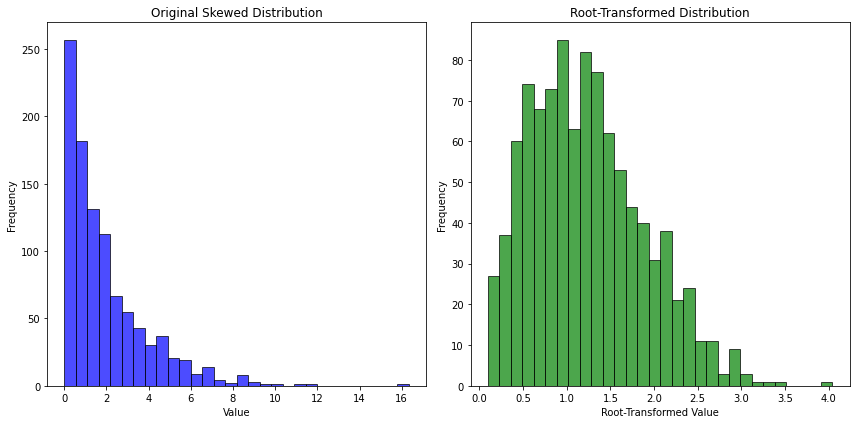

In [6]:
# Apply root transformation (square root) to the skewed data
root_transformed_data = np.sqrt(skewed_data)

# Plot the distribution before and after root transformation
plt.figure(figsize=(12, 6))

# Before root transformation
plt.subplot(1, 2, 1)
plt.hist(skewed_data, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Original Skewed Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# After root transformation
plt.subplot(1, 2, 2)
plt.hist(root_transformed_data, bins=30, color='green', alpha=0.7, edgecolor='black')
plt.title('Root-Transformed Distribution')
plt.xlabel('Root-Transformed Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### **4. Transformacje potęgowe (Box-Cox, Yeo-Johnson)**

#### **4.1. Box-Cox Transformation**
- **Cel**: Przekształcenie danych do rozkładu normalnego.
- **Wzór**:
  $$
  z = 
  \begin{cases} 
      \frac{x^\lambda - 1}{\lambda}, & \text{dla } \lambda \neq 0 \\
      \log(x), & \text{dla } \lambda = 0 
  \end{cases}
  $$

- **Kiedy stosować?**
  - Gdy model zakłada rozkład normalny danych, np. w regresji liniowej.

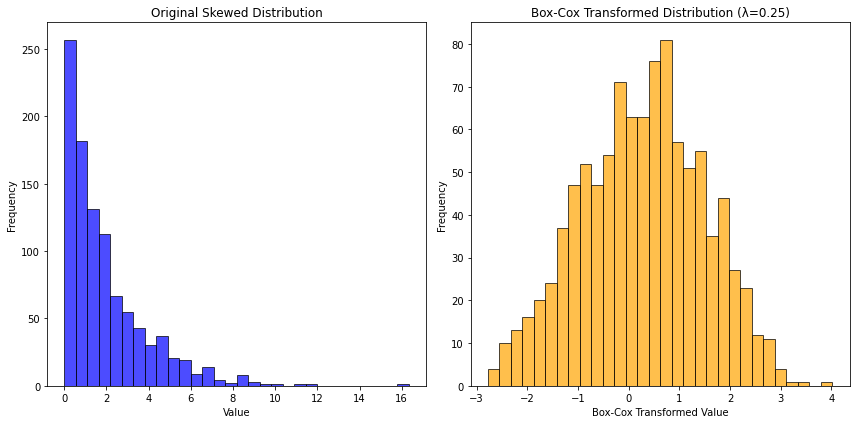

In [7]:
from scipy.stats import boxcox

# Apply Box-Cox transformation (requires all values to be positive)
# Adding a small constant to avoid zero values
boxcox_transformed_data, lambda_value = boxcox(skewed_data + 1e-6)

# Plot the distribution before and after Box-Cox transformation
plt.figure(figsize=(12, 6))

# Before Box-Cox transformation
plt.subplot(1, 2, 1)
plt.hist(skewed_data, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Original Skewed Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# After Box-Cox transformation
plt.subplot(1, 2, 2)
plt.hist(boxcox_transformed_data, bins=30, color='orange', alpha=0.7, edgecolor='black')
plt.title(f'Box-Cox Transformed Distribution (λ={lambda_value:.2f})')
plt.xlabel('Box-Cox Transformed Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### **5. Usuwanie wartości odstających**

Usuwanie wartości odstających może również być uważane za transformację danych.

- **Cel**: Zmniejszenie wpływu skrajnych wartości, które mogą negatywnie wpłynąć na model.
- **Metody**:
  - Przycinanie wartości do określonego przedziału.
  - Zastępowanie wartości odstających medianą lub średnią.

---

# Kodowanie Cech w Klasyfikacji

Kodowanie cech to proces przekształcania danych kategorycznych na reprezentację numeryczną, którą mogą przetwarzać algorytmy Machine Learning. Wyróżniamy kilka najczęściej stosowanych metod kodowania:

### 1. **One-Hot Encoding**
- Tworzy binarne kolumny dla każdej kategorii w cechach nominalnych.
- Używane, gdy cechy nie mają porządku (np. `Kolor: [Czerwony, Zielony, Niebieski]`).
- Przykład:
  - Wejście: `Kolor = [Czerwony, Zielony, Czerwony]`
  - Wyjście: `Czerwony = [1, 0, 1]`, `Zielony = [0, 1, 0]`, `Niebieski = [0, 0, 0]`.

### 2. **Label Encoding**
- Przekształca kategorie na liczby całkowite.
- Stosowane, gdy kategorie mają naturalny porządek (np. `Rozmiar: [Mały, Średni, Duży]`).
- Przykład:
  - Wejście: `Rozmiar = [Mały, Średni, Duży]`
  - Wyjście: `Mały = 0`, `Średni = 1`, `Duży = 2`.

### 3. **Binary Encoding**
- Kategoryczne dane są najpierw zakodowane jako liczby całkowite, a następnie konwertowane do reprezentacji binarnej.
- Zmniejsza wymiarowość w porównaniu z One-Hot Encoding.
- Przykład:
  - Wejście: `Kolor = [Czerwony, Zielony, Niebieski]`
  - Liczby całkowite: `Czerwony = 1, Zielony = 2, Niebieski = 3`
  - Binarnie: `Czerwony = 01, Zielony = 10, Niebieski = 11`.

### 4. **Target Encoding**
- Zastępuje kategorie średnią, medianą lub inną statystyką zmiennej docelowej w ramach danej kategorii.
- Przykład:
  - Wejście: `Kolor = [Czerwony, Zielony, Niebieski]`
  - Średnia celu: `Czerwony = 0.8, Zielony = 0.5, Niebieski = 0.3`.

### 5. **Frequency Encoding**
- Każdej kategorii przypisuje wartość odpowiadającą jej częstości występowania w danych.
- Przykład:
  - Wejście: `Kolor = [Czerwony, Zielony, Czerwony, Niebieski]`
  - Wyjście: `Czerwony = 2, Zielony = 1, Niebieski = 1`.

### Wybór Metody Kodowania
- **One-Hot Encoding**: Gdy brak naturalnego porządku w danych i cech jest niewiele.
- **Label Encoding**: Gdy istnieje porządek między kategoriami.
- **Target Encoding**: Przy danych z dużą liczbą kategorii, szczególnie w problemach z niskim zbalansowaniem klas.
- **Frequency Encoding**: W dużych zbiorach danych lub w modelach z automatyczną selekcją cech.

Kodowanie cech jest kluczowym krokiem w procesie przygotowywania danych do klasyfikacji i może znacząco wpłynąć na wydajność modelu.
